Results of experiment duplication from notebook 689_project.ipynb


In [1]:
import pickle

tree_depth_options = [3,5,8,10]
estimator_options = [50, 100, 200, 300, 400, 500]
results = dict()

for max_depth in tree_depth_options:
    for estimators in estimator_options:
        try:
            with open(f'Results/results_estimators={estimators}_depth={max_depth}.pkl', 'rb+') as file:
                results[(max_depth, estimators)] = pickle.load(file)
        except:
            pass

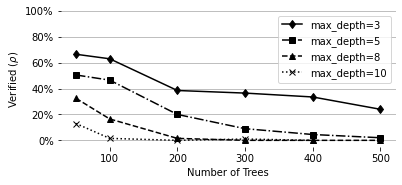

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

symbol_by_depth = {
    '3':{'marker':'d', 'linestyle':'solid'},
    '5':{'marker':'s', 'linestyle':'dashdot'},
    '8':{'marker':'^', 'linestyle':'dashed'},
    '10':{'marker':'x', 'linestyle':'dotted'}
}

plt.figure(figsize=(6,2.5), facecolor='white')
for max_depth in tree_depth_options:
    rho_values = []
    estimator_values = []
    for estimators in estimator_options:
        try:
            this_results = results[(max_depth, estimators)]
        except:
            continue
            
        rho_values.append(this_results['unsat_rate'])
        estimator_values.append(estimators)
    plt.plot(
        estimator_values, 
        rho_values, 
        label=f'max_depth={max_depth}', 
        marker=symbol_by_depth[str(max_depth)]['marker'], 
        linestyle=symbol_by_depth[str(max_depth)]['linestyle'], 
        color='black'
    )

plt.ylim(-0.05,1)  # -0.01 is so the y=0 line shows up
plt.ylabel(r'Verified ($\rho$)')
plt.xlabel('Number of Trees')
plt.legend(loc='best')
yticks = np.arange(0, 1.2, 0.2)
plt.yticks(yticks, [f'{int(i*100)}%' for i in yticks])
plt.grid(True, 'major', 'y')
plt.box(on=None)
plt.show()

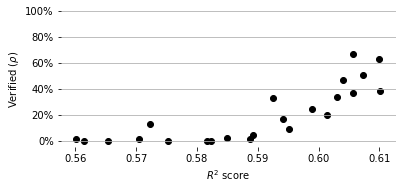

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

symbol_by_depth = {
    '3':{'marker':'d', 'linestyle':'solid'},
    '5':{'marker':'s', 'linestyle':'dashdot'},
    '8':{'marker':'^', 'linestyle':'dashed'},
    '10':{'marker':'x', 'linestyle':'dotted'}
}

plt.figure(figsize=(6,2.5), facecolor='white')
rho_values = []
test_errors = []
for max_depth in tree_depth_options:
    
    for estimators in estimator_options:
        try:
            this_results = results[(max_depth, estimators)]
        except:
            continue
            
        rho_values.append(this_results['unsat_rate'])
        test_errors.append(this_results['r2_score'])
plt.scatter(
    test_errors, 
    rho_values, 
    #label=f'max_depth={max_depth}', 
    #marker=symbol_by_depth[str(max_depth)]['marker'], 
    #linestyle=symbol_by_depth[str(max_depth)]['linestyle'], 
    color='black'
)

plt.ylim(-0.05,1)  # -0.01 is so the y=0 line shows up
plt.ylabel(r'Verified ($\rho$)')
plt.xlabel(r'$R^2$ score')
# plt.legend(loc='best')
yticks = np.arange(0, 1.2, 0.2)
plt.yticks(yticks, [f'{int(i*100)}%' for i in yticks])
plt.grid(True, 'major', 'y')
plt.box(on=None)
plt.show()